In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from functions import *
from sklearn.preprocessing import LabelEncoder


| Código  | Litologia                |
|---------|--------------------------|
| 30000   | Sandstone (Arenito)      |
| 65030   | Sandstone/Shale (Arenito/Argilito) |
| 65000   | Shale (Argilito)         |
| 80000   | Marl (Marga)             |
| 74000   | Dolomite (Dolomita)      |
| 70000   | Limestone (Calcário)     |
| 70032   | Chalk (Giz)              |
| 88000   | Halite (Halita)          |
| 86000   | Anhydrite (Anidrita)     |
| 99000   | Tuff (Tufo)              |
| 90000   | Coal (Carvão)            |
| 93000   | Basement (Substrato)     |


In [48]:
#Carregando arquivo csv
df = pd.read_csv('Data/train.csv',sep=';')
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [50]:
df['DTS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1170511 entries, 0 to 1170510
Series name: DTS
Non-Null Count   Dtype  
--------------   -----  
174613 non-null  float64
dtypes: float64(1)
memory usage: 8.9 MB


In [51]:
#Verificando o nome das colunas
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [52]:
#Verificando número de poços
print(f"Número de poços disponíveis: {len(df.WELL.unique())}")

Número de poços disponíveis: 98


In [53]:
for i in df.WELL.unique():
    print(i)

15/9-13
15/9-15
15/9-17
16/1-2
16/1-6 A
16/10-1
16/10-2
16/10-3
16/10-5
16/11-1 ST3
16/2-11 A
16/2-16
16/2-6
16/4-1
16/5-3
16/7-4
16/7-5
16/8-1
17/11-1
25/11-15
25/11-19 S
25/11-5
25/2-13 T4
25/2-14
25/2-7
25/3-1
25/4-5
25/5-1
25/5-4
25/6-1
25/6-2
25/6-3
25/7-2
25/8-5 S
25/8-7
25/9-1
26/4-1
29/6-1
30/3-3
30/3-5 S
30/6-5
31/2-1
31/2-19 S
31/2-7
31/2-8
31/2-9
31/3-1
31/3-2
31/3-3
31/3-4
31/4-10
31/4-5
31/5-4 S
31/6-5
31/6-8
32/2-1
33/5-2
33/6-3 S
33/9-1
33/9-17
34/10-19
34/10-21
34/10-33
34/10-35
34/11-1
34/11-2 S
34/12-1
34/2-4
34/3-1 A
34/4-10 R
34/5-1 A
34/5-1 S
34/7-13
34/7-20
34/7-21
34/8-1
34/8-3
34/8-7 R
35/11-1
35/11-10
35/11-11
35/11-12
35/11-13
35/11-15 S
35/11-6
35/11-7
35/12-1
35/3-7 S
35/4-1
35/8-4
35/8-6 S
35/9-10 S
35/9-2
35/9-5
35/9-6 S
36/7-3
7/1-1
7/1-2 S


In [54]:
well_not_null = [i for i in df.WELL.unique() if True in df[df.WELL == i].isnull().any().values]
print(f'Número de poços com valores nulos: {len(well_not_null)}')

Número de poços com valores nulos: 98


##### Todos os poços tem valores nulos.

In [55]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [56]:
#### Como essa será uma aplicação simples, irei separar os dados com o maior número de informações
cols =['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION','CALI', 'RMED', 'RDEP', 'RHOB',
        'GR','NPHI','DTC','FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE']

df = df[~df.NPHI.isnull()][cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765409 entries, 4238 to 1170488
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               765409 non-null  object 
 1   DEPTH_MD                           765409 non-null  float64
 2   X_LOC                              761901 non-null  float64
 3   Y_LOC                              761901 non-null  float64
 4   Z_LOC                              761901 non-null  float64
 5   GROUP                              765409 non-null  object 
 6   FORMATION                          726897 non-null  object 
 7   CALI                               732451 non-null  float64
 8   RMED                               748289 non-null  float64
 9   RDEP                               761704 non-null  float64
 10  RHOB                               750893 non-null  float64
 11  GR                                 76540

In [57]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642770 entries, 4238 to 1170446
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               642770 non-null  object 
 1   DEPTH_MD                           642770 non-null  float64
 2   X_LOC                              642770 non-null  float64
 3   Y_LOC                              642770 non-null  float64
 4   Z_LOC                              642770 non-null  float64
 5   GROUP                              642770 non-null  object 
 6   FORMATION                          642770 non-null  object 
 7   CALI                               642770 non-null  float64
 8   RMED                               642770 non-null  float64
 9   RDEP                               642770 non-null  float64
 10  RHOB                               642770 non-null  float64
 11  GR                                 64277

In [58]:
print(f'Número de Poços: {len(df.WELL.unique())}')

Número de Poços: 96


In [59]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC',
       'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

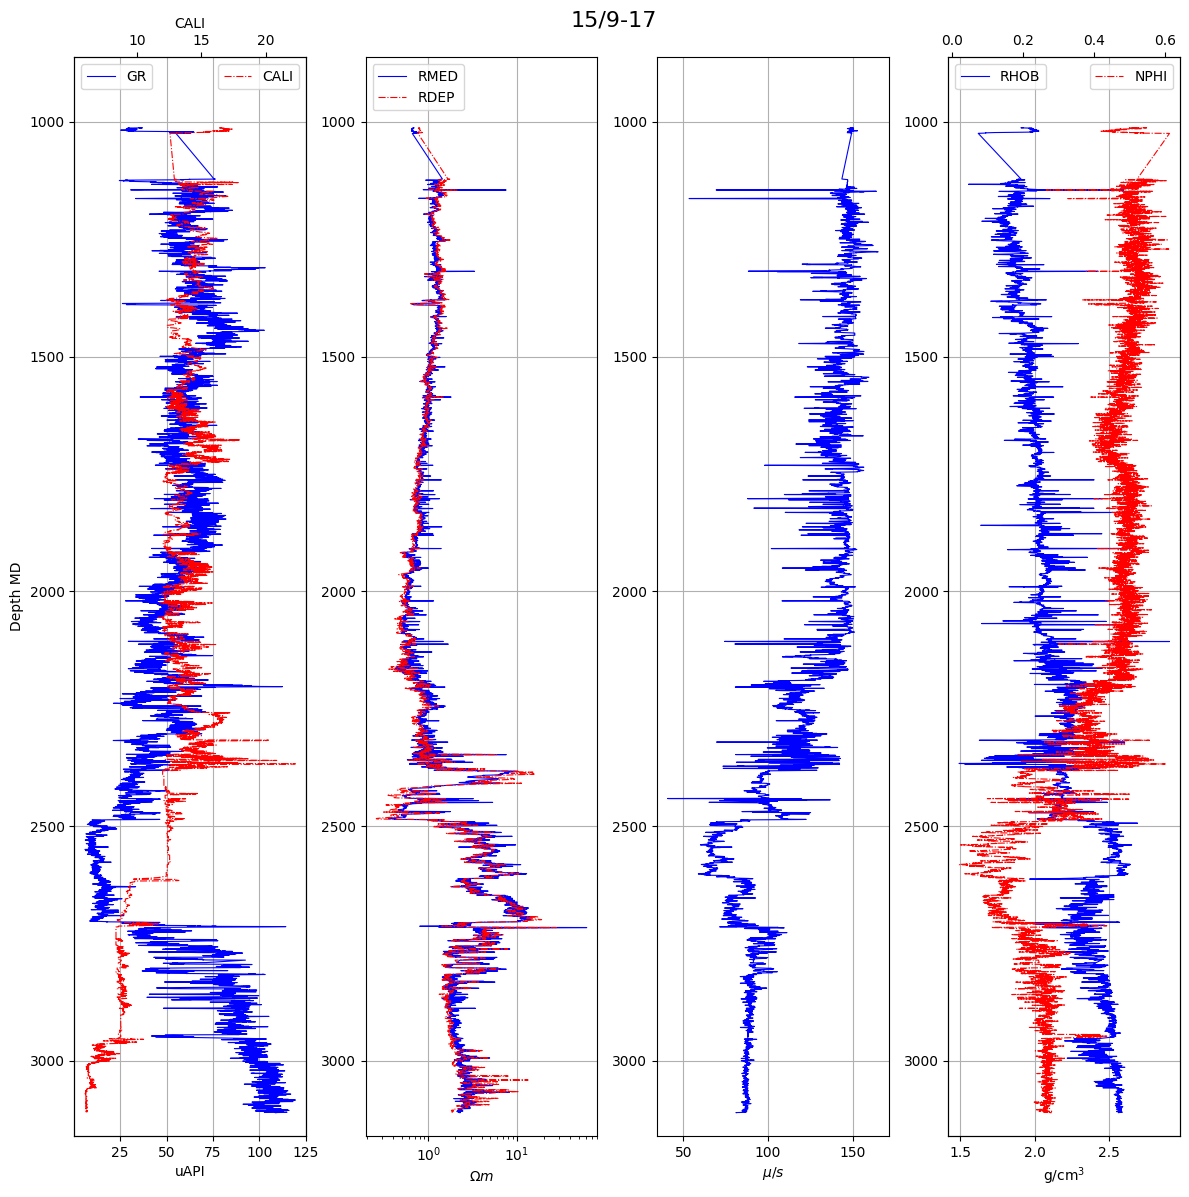

In [60]:
plot_logs(df[df.WELL==df.WELL.unique()[2]])

In [61]:
#Montando uma lista com as localizações da primeira medida de X e Y
loc = [(float(df[df.WELL==i].X_LOC[0:1]),float(df[df.WELL==i].Y_LOC[0:1])) for i in df.WELL.unique()]

X,Y = list(zip(*loc))

C:\Users\Acer3\AppData\Local\Temp\ipykernel_6048\3408780481.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  loc = [(float(df[df.WELL==i].X_LOC[0:1]),float(df[df.WELL==i].Y_LOC[0:1])) for i in df.WELL.unique()]


C:\Users\Acer3\AppData\Local\Temp\ipykernel_6048\2829372567.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


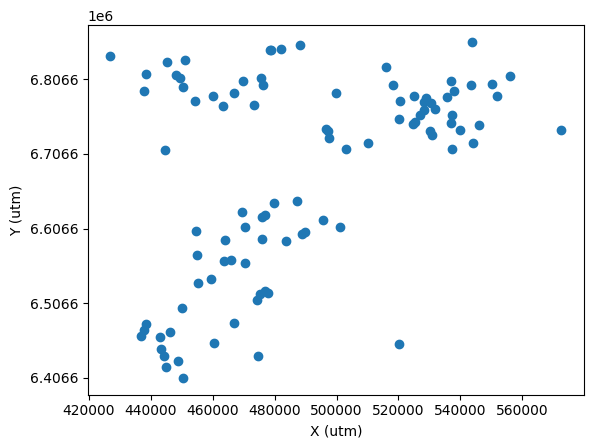

In [62]:
fig,axes = plt.subplots()

axes.scatter(X,Y)
axes.set_yticks(np.arange(np.min(Y), np.max(Y),100000))

axes.set_xlabel('X (utm)')
axes.set_ylabel('Y (utm)')

fig.show()

#### Tratamento dos dados

In [63]:
#Veja que as variáveis GROUP e FORMATION constam como object (str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642770 entries, 4238 to 1170446
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               642770 non-null  object 
 1   DEPTH_MD                           642770 non-null  float64
 2   X_LOC                              642770 non-null  float64
 3   Y_LOC                              642770 non-null  float64
 4   Z_LOC                              642770 non-null  float64
 5   GROUP                              642770 non-null  object 
 6   FORMATION                          642770 non-null  object 
 7   CALI                               642770 non-null  float64
 8   RMED                               642770 non-null  float64
 9   RDEP                               642770 non-null  float64
 10  RHOB                               642770 non-null  float64
 11  GR                                 64277

In [64]:
#Criando um rótulo numérico para GROUP e FORMATION
lb_group = LabelEncoder()
lb_group.fit(df['GROUP'])
df['GROUP_NUM'] = lb_group.transform(df['GROUP'])

lb_FORM = LabelEncoder()
lb_FORM.fit(df['FORMATION'])
df['FORM_NUM'] = lb_FORM.transform(df['FORMATION'])

In [66]:
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,GROUP_NUM,FORM_NUM
4238,15/9-13,1138.704,437640.84375,6470976.0,-1113.655396,NORDLAND GP.,Utsira Fm.,19.322735,1.013309,1.091499,1.774626,55.892757,0.765867,147.837677,30000,1.0,6,66
4239,15/9-13,1138.856,437640.84375,6470976.0,-1113.807373,NORDLAND GP.,Utsira Fm.,18.613674,1.088184,1.122706,1.800986,60.929138,0.800262,142.382431,65000,1.0,6,66
4240,15/9-13,1139.008,437640.84375,6470976.0,-1113.959473,NORDLAND GP.,Utsira Fm.,18.212072,1.127155,1.148141,1.817696,62.117264,0.765957,138.258331,65000,1.0,6,66
4241,15/9-13,1139.160,437640.84375,6470976.0,-1114.111450,NORDLAND GP.,Utsira Fm.,18.134182,1.141467,1.170984,1.829333,61.010860,0.702521,139.198914,65000,1.0,6,66
4242,15/9-13,1139.312,437640.84375,6470976.0,-1114.263428,NORDLAND GP.,Utsira Fm.,18.033762,1.138007,1.184080,1.813854,58.501236,0.639708,144.290085,65000,1.0,6,66


In [67]:
#Vamos separar 5 poços para se tornarem o blind do experimento
blind = df[df.WELL.isin(np.random.choice(df.WELL.unique(),size=5))]
dataset = df[~df.WELL.isin(np.random.choice(df.WELL.unique(),size=5))]

print(f'Número de elementos no treino: {len(dataset)}\nNúmero de elementos no blind: {len(blind)}')
print(f'propoção blind/test: {len(blind)/len(dataset)*100:.2f}%')

Número de elementos no treino: 591173
Número de elementos no blind: 30801
propoção blind/test: 5.21%


### Análise de atributos (variáveis)

In [68]:
dataset

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,GROUP_NUM,FORM_NUM
4238,15/9-13,1138.7040,437640.84375,6470976.0,-1113.655396,NORDLAND GP.,Utsira Fm.,19.322735,1.013309,1.091499,1.774626,55.892757,0.765867,147.837677,30000,1.0,6,66
4239,15/9-13,1138.8560,437640.84375,6470976.0,-1113.807373,NORDLAND GP.,Utsira Fm.,18.613674,1.088184,1.122706,1.800986,60.929138,0.800262,142.382431,65000,1.0,6,66
4240,15/9-13,1139.0080,437640.84375,6470976.0,-1113.959473,NORDLAND GP.,Utsira Fm.,18.212072,1.127155,1.148141,1.817696,62.117264,0.765957,138.258331,65000,1.0,6,66
4241,15/9-13,1139.1600,437640.84375,6470976.0,-1114.111450,NORDLAND GP.,Utsira Fm.,18.134182,1.141467,1.170984,1.829333,61.010860,0.702521,139.198914,65000,1.0,6,66
4242,15/9-13,1139.3120,437640.84375,6470976.0,-1114.263428,NORDLAND GP.,Utsira Fm.,18.033762,1.138007,1.184080,1.813854,58.501236,0.639708,144.290085,65000,1.0,6,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170442,7/1-2 S,3159.5844,444920.37500,6421578.5,-3098.725830,VESTLAND GP.,Bryne Fm.,8.420886,0.789877,0.831749,2.327454,30.693535,0.165856,102.210472,30000,1.0,11,7
1170443,7/1-2 S,3159.7364,444920.37500,6421578.5,-3098.877441,VESTLAND GP.,Bryne Fm.,8.428133,0.815565,0.854277,2.365172,32.359882,0.174907,102.637398,30000,1.0,11,7
1170444,7/1-2 S,3159.8884,444920.37500,6421578.5,-3099.029541,VESTLAND GP.,Bryne Fm.,8.409408,0.859699,0.895604,2.386400,36.232948,0.182118,102.694748,30000,1.0,11,7
1170445,7/1-2 S,3160.0404,444920.37500,6421578.5,-3099.181396,VESTLAND GP.,Bryne Fm.,8.400051,0.885569,0.917150,2.362845,41.044968,0.176795,102.095696,30000,1.0,11,7
